# EV_Market_Size_Analysis_using_Python

**importing the necessary Python libraries**

In [1]:
import pandas as pd

In [4]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [7]:
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

**The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:**

- VIN (1-10): Partial Vehicle Identification Number.
- County: The county in which the vehicle is registered.
- City: The city in which the vehicle is registered.
- State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
- Postal Code: The postal code where the vehicle is registered.
- Model Year: The year of the vehicle model.
- Make: The manufacturer of the vehicle.
- Model: The model of the vehicle.
- Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
- Electric Range: The maximum range of the vehicle on a single charge (in miles).
- Base MSRP: The Manufacturer’s Suggested Retail Price.
- Legislative District: The legislative district where the vehicle is registered.
- DOL Vehicle ID: Department of Licensing Vehicle Identification.
- Vehicle Location: Geographic coordinates of the vehicle location.
- Electric Utility: The electric utility service provider for the vehicle’s location.
- 2020 Census Tract: The census tract for the vehicle’s location.

**Let's clean the EV population dataset for the United States before proceeding.**

In [8]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [14]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [15]:
ev_data = ev_data.dropna()

**Let's analyze the EV adoption over time by visualizing the number of EVs registered by model year to understand the growth in the EV population.**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

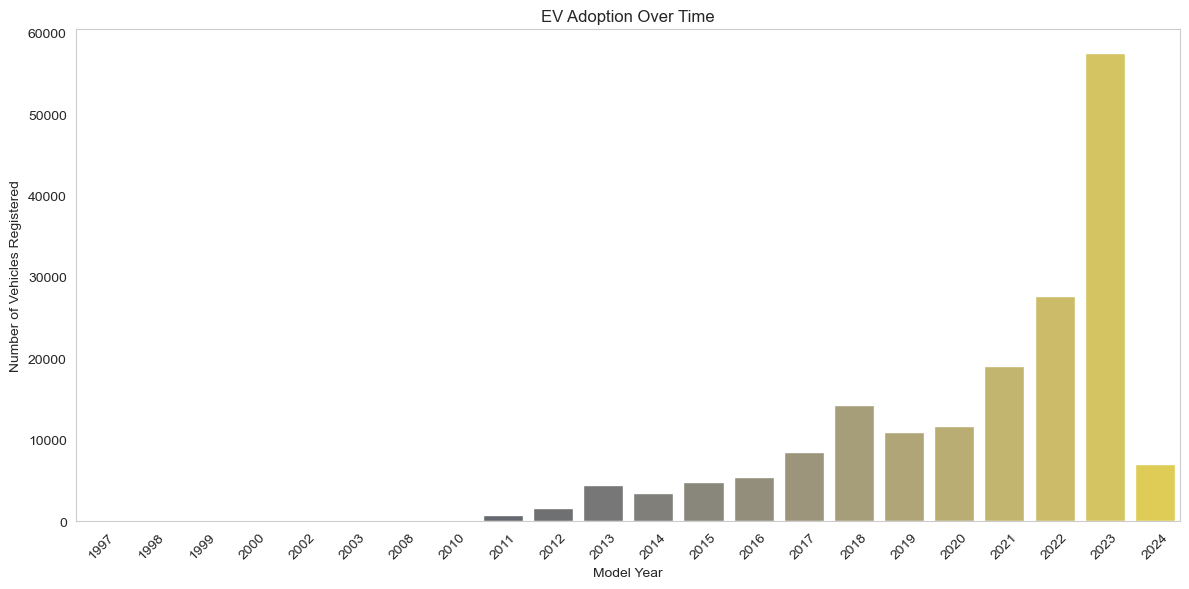

In [55]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="cividis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

The bar chart shows a clear increase in EV adoption over time, with a significant upward trend starting around 2016. The number of registered EVs rises rapidly from 2017 onwards, peaking in 2023 with the highest number of registrations.

**Let's select the top 3 counties based on EV registrations and analyze the distribution of EVs within their cities:**

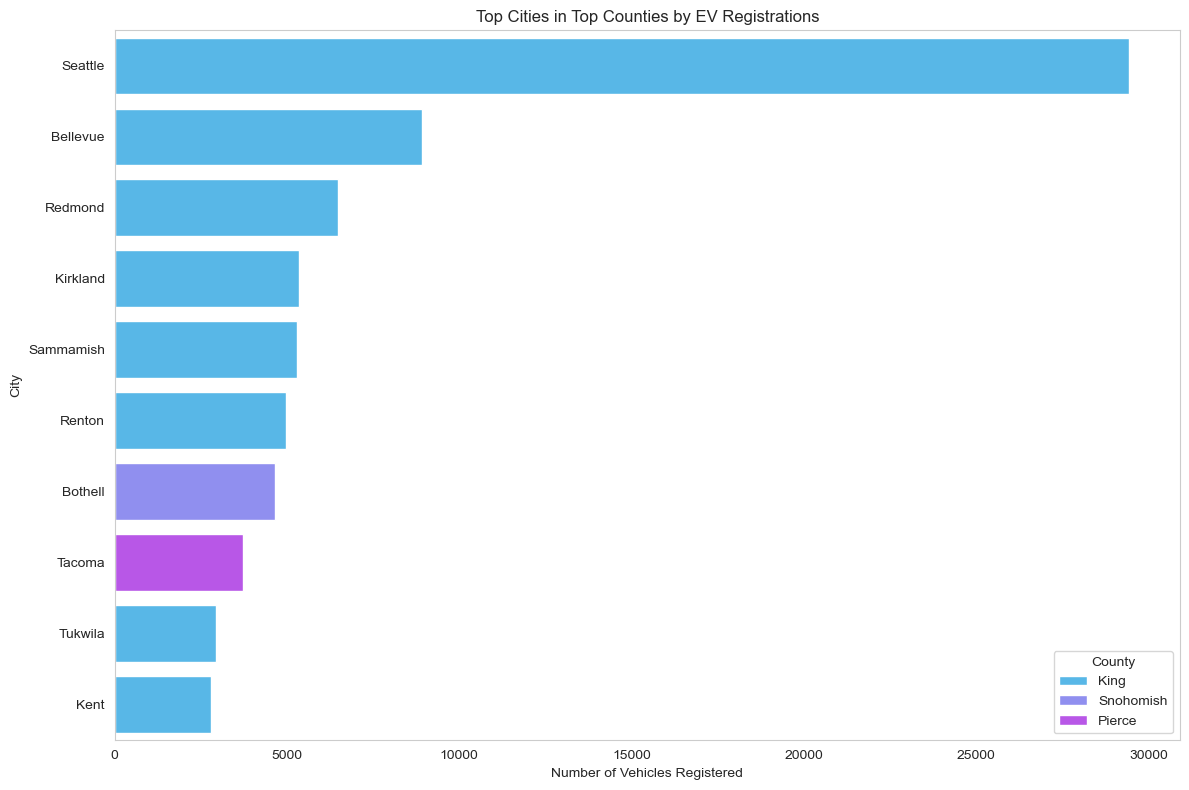

In [58]:
# distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="cool", dodge = False)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County', loc = 'lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

The graph compares EV registrations in cities within three counties: King, Snohomish, and Pierce. Horizontal bars represent cities, color-coded by county, with their length indicating the number of registered vehicles. Key findings include:

- Seattle (King County) leads with the highest EV registrations.
- Bellevue and Redmond (King County) follow, though with significantly fewer registrations than Seattle.
- City in Snohomish County, like Bothell, show moderate registrations.
- Tacoma (Pierce County) have the fewest registrations.
- Most cities shown are from King County, indicating it dominates EV registrations.

Overall, EV adoption is concentrated in specific areas, particularly in King County.

**Let's explore the types of EVs in the dataset by visualizing the distribution between BEV and PHEV to understand consumer preferences and adoption patterns:**

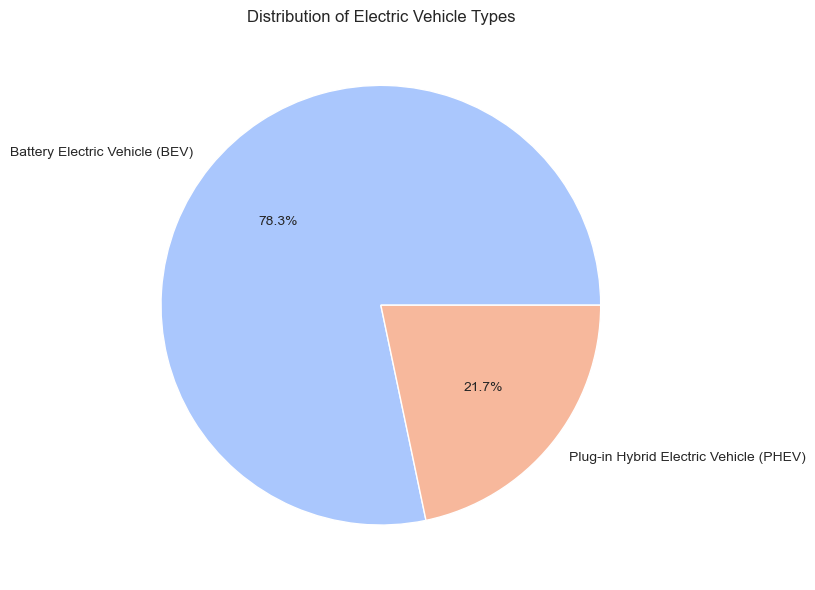

In [60]:
#Analyzing EV Type Distribution
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(ev_type_distribution, labels=ev_type_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(ev_type_distribution)))
plt.title('Distribution of Electric Vehicle Types')
plt.tight_layout()
plt.show()


The graph indicates that BEVs are more popular than PHEVs among registered electric vehicles in the United States.

**Let's analyze the most popular EV manufacturers and models to understand consumer preferences and market dominance.**

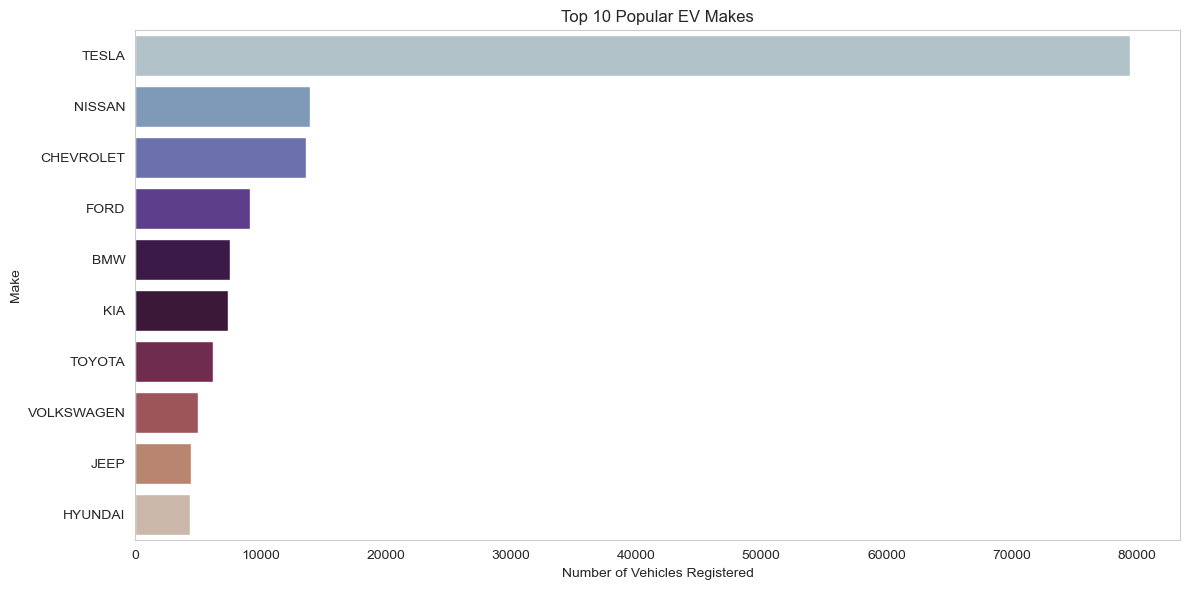

In [62]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)
# Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="twilight")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.grid(False)
plt.tight_layout()
plt.show()

The chart shows:

- TESLA leads with the highest registrations.
- NISSAN is second, followed by CHEVROLET.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in order.

**Let's analyze the top models from these leading manufacturers to better understand consumer preferences.**

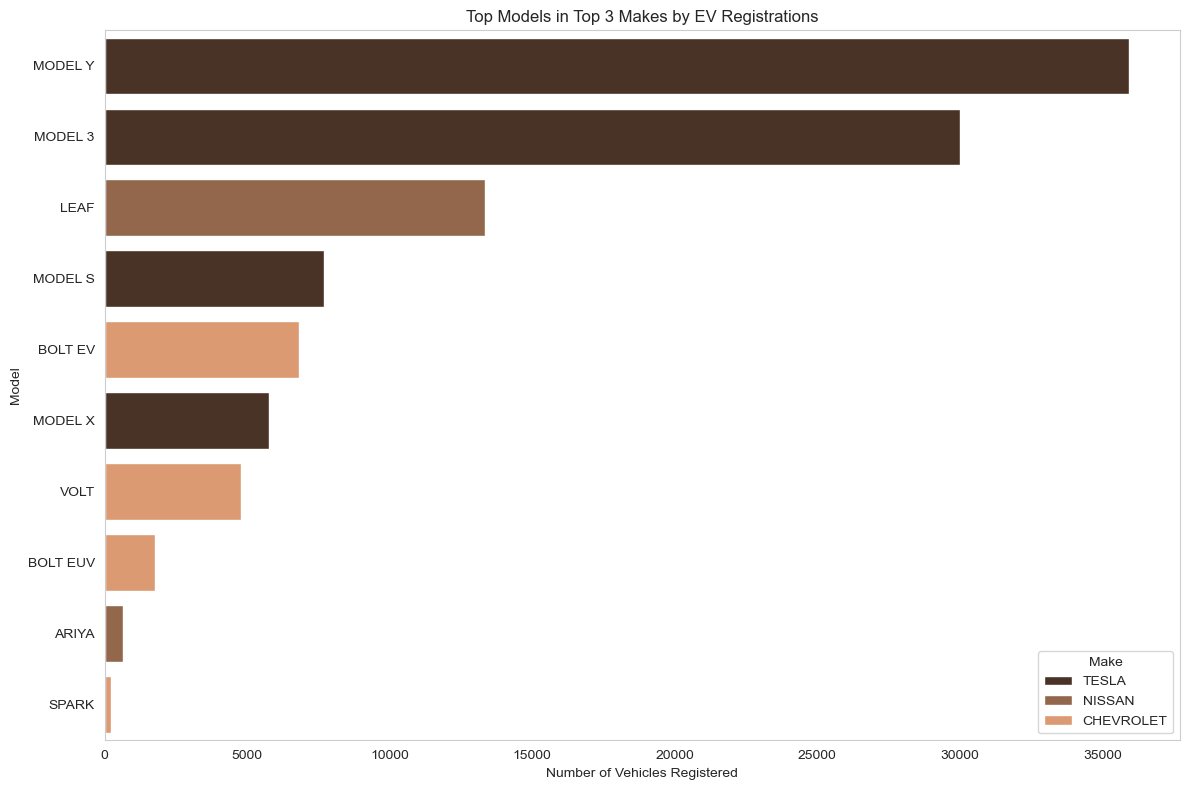

In [63]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top 3 manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="copper", dodge = False)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc = 'lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

The graph shows EV registrations for top models from TESLA, NISSAN, and CHEVROLET:

- TESLA’s MODEL Y is the top EV.
- MODEL 3 follows as the second most popular.
- NISSAN’s LEAF is the leading non-TESLA model.
- TESLA’s MODEL S and MODEL X also rank high.
- CHEVROLET’s BOLT EV and VOLT are notable, with BOLT EUV also recognized.
- NISSAN’s ARIYA and CHEVROLET’s SPARK have the fewest registrations, indicating lower popularity.

**Next, We'll analyze the electric range of vehicles, electric range indicates how far an EV can travel on a single charge .**

C:\Users\bisht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


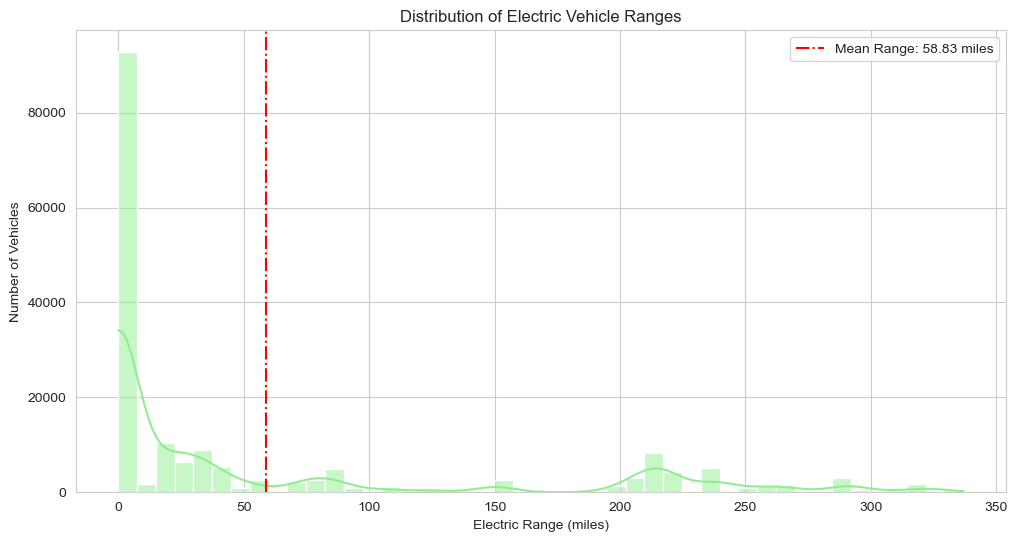

In [76]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=45, kde=True, color='lightgreen')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='-.', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The graph shows the average electric range of vehicles. Key points are:

- Most vehicles have a low range, peaking around 50 miles.
- The range distribution has a long tail towards higher values, but few vehicles have very high ranges.
- The average range is about 58.84 miles, which is low compared to the highest ranges.
- Although some EVs can reach up to 350 miles, most vehicles have a range below the average.

In summary, while high-range EVs exist, the average range is low due to many vehicles having shorter ranges.

**Next, Let’s examine how electric ranges have changed over model years to see if advancements in battery technology have led to longer ranges, addressing range anxiety.**

C:\Users\bisht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bisht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


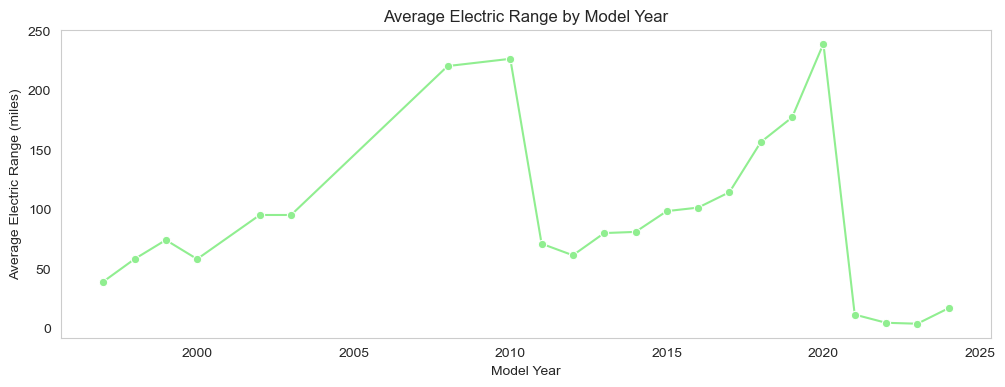

In [81]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 4))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='lightgreen')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(False)
plt.show()